# DATA ANALYSIS AND GRADE PREDICTION ON LENDING CLUB LOAN DATA

In [1]:
#import all necessary libraries

import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the data into a Pandas dataframe
df = pd.read_csv('LendingData.csv',sep=',', dtype='unicode')
#df = pd.read_csv('accepted_2007_to_2018Q4.csv',sep=',', dtype='unicode')

In [3]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year
0,2099485,NaN,NaN,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
1,2099486,NaN,NaN,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
2,2099487,NaN,NaN,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
3,2099488,NaN,NaN,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
4,2099489,NaN,NaN,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,2142015,NaN,NaN,3500,3500,225.0,36 months,10.28,113.39,C,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007
42531,2142016,NaN,NaN,1000,1000,0.0,36 months,9.64,32.11,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007
42532,2142017,NaN,NaN,2525,2525,225.0,36 months,9.33,80.69,B,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007
42533,2142018,NaN,NaN,6500,6500,0.0,36 months,8.38,204.84,A,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2007


### DATA CLEANING

In [4]:
#Checking for null values per column
df.isnull().sum()

Unnamed: 0                   0
id                       42535
member_id                42535
loan_amnt                    0
funded_amnt                  0
                         ...  
settlement_date          42375
settlement_amount        42375
settlement_percentage    42375
settlement_term          42375
Year                         0
Length: 147, dtype: int64

In [5]:
#Dropping columns having all NA values
blankColumns = df.columns[(df.isnull().sum() == df.shape[0])]
df = df.drop(blankColumns, axis=1)
df.shape


(42535, 65)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  42535 non-null  object
 1   loan_amnt                   42535 non-null  object
 2   funded_amnt                 42535 non-null  object
 3   funded_amnt_inv             42535 non-null  object
 4   term                        42535 non-null  object
 5   int_rate                    42535 non-null  object
 6   installment                 42535 non-null  object
 7   grade                       42535 non-null  object
 8   sub_grade                   42535 non-null  object
 9   emp_title                   39909 non-null  object
 10  emp_length                  41423 non-null  object
 11  home_ownership              42535 non-null  object
 12  annual_inc                  42531 non-null  object
 13  verification_status         42535 non-null  ob

In [7]:
#Generating the % of Null values in each column
(df.isnull().sum()/len(df.index))*100

Unnamed: 0                0.000000
loan_amnt                 0.000000
funded_amnt               0.000000
funded_amnt_inv           0.000000
term                      0.000000
                           ...    
settlement_date          99.623839
settlement_amount        99.623839
settlement_percentage    99.623839
settlement_term          99.623839
Year                      0.000000
Length: 65, dtype: float64

In [8]:
#Dropping columns with more than 60% NA values
sixty = df.columns[100*(df.isnull().sum()/len(df.index)) > 60]
df = df.drop(sixty, axis=1)
df.shape

(42535, 56)

In [9]:
(df.isnull().sum()/len(df.index))*100

Unnamed: 0                     0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.173739
emp_length                     2.614318
home_ownership                 0.000000
annual_inc                     0.009404
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
desc                          31.251910
purpose                        0.000000
title                          0.030563
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.068179
earliest_cr_line               0.068179


In [10]:
#Keeping only the required columns after analysis - remove categorical
keep = ['funded_amnt','term','int_rate','installment','grade','sub_grade',
        'emp_length','home_ownership','annual_inc','verification_status',
        'issue_d','loan_status','purpose','zip_code','addr_state','dti',
        'delinq_2yrs','open_acc','total_acc']
df = df[keep]

In [11]:
df

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,open_acc,total_acc
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0.0,3.0,9.0
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.0,0.0,3.0,4.0
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0.0,2.0,10.0
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.0,0.0,10.0,37.0
4,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,other,972xx,OR,17.94,0.0,15.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500,36 months,10.28,113.39,C,C1,< 1 year,RENT,180000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,100xx,NY,10.0,NaN,NaN,NaN
42531,1000,36 months,9.64,32.11,B,B4,< 1 year,RENT,12000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,021xx,MA,10.0,NaN,NaN,NaN
42532,2525,36 months,9.33,80.69,B,B3,< 1 year,RENT,110000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,100xx,NY,10.0,NaN,NaN,NaN
42533,6500,36 months,8.38,204.84,A,A5,< 1 year,NONE,NaN,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,other,100xx,NY,4.0,NaN,NaN,NaN


In [12]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
42530     < 1 year
42531     < 1 year
42532     < 1 year
42533     < 1 year
42534    10+ years
Name: emp_length, Length: 42535, dtype: object

In [13]:
#Data cleaning
#Dropping rows with Null values in Employee length
df = df[~df['emp_length'].isnull()]
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

<ipython-input-13-c634f90f7dba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
<ipython-input-13-c634f90f7dba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))


In [14]:
df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
42530     1
42531     1
42532     1
42533     1
42534    10
Name: emp_length, Length: 41423, dtype: int64

In [15]:
#Keeping only Fully Paid and Charged Off loans
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df['loan_status'].value_counts()

Fully Paid     33268
Charged Off     5440
Name: loan_status, dtype: int64

In [16]:
#Cleaning the term column for modelling part
df['term'] = df['term'].apply(lambda x: re.findall('\d+', str(x))[0])
df['term'] = df['term'].apply(lambda x: pd.to_numeric(x))

In [17]:
df['issue_d']

0        Dec-2011
1        Dec-2011
2        Dec-2011
3        Dec-2011
4        Dec-2011
           ...   
39781    Jul-2007
39782    Jul-2007
39783    Jul-2007
39784    Jul-2007
39785    Jun-2007
Name: issue_d, Length: 38708, dtype: object

In [18]:
df['issue_d'] = df['issue_d'].str.split('-').str[1]

In [19]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4         Fully Paid
            ...     
39781     Fully Paid
39782     Fully Paid
39783     Fully Paid
39784     Fully Paid
39785     Fully Paid
Name: loan_status, Length: 38708, dtype: object

In [20]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_encoded'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_encoded'] = df['loan_encoded'].apply(lambda x: pd.to_numeric(x))

In [21]:
df['loan_encoded']

0        0
1        1
2        0
3        0
4        0
        ..
39781    0
39782    0
39783    0
39784    0
39785    0
Name: loan_encoded, Length: 38708, dtype: int64

In [22]:
# converting loan_status to integer type - add to ppt
df['loan_encoded'].value_counts()

0    33268
1     5440
Name: loan_encoded, dtype: int64

In [23]:
#Changing column type
df['funded_amnt'] = df['funded_amnt'].astype(float)
df['int_rate'] = df['int_rate'].astype(float)
df['installment'] = df['installment'].astype(float)
df['annual_inc'] = df['annual_inc'].astype(float)
df['dti'] = df['dti'].astype(float)
df['delinq_2yrs'] = df['delinq_2yrs'].astype(float)
df['open_acc'] = df['open_acc'].astype(float)
df['total_acc '] = df['total_acc'].astype(float)

In [24]:
df['grade'].value_counts()

B    11699
A     9695
C     7938
D     5213
E     2811
F     1035
G      317
Name: grade, dtype: int64

### DATA ENCODING

In [25]:
lb_make = LabelEncoder()
df['grade_encoded'] = lb_make.fit_transform(df['grade'])

### DATA VISUALIZATION

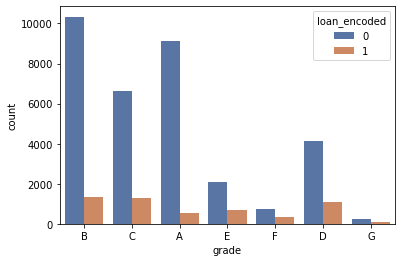

In [26]:
# plotting default rates across grade of the loan - fully paid and partially in each grade 
sns.countplot(x='grade',hue='loan_encoded',palette='deep', data=df)
plt.show()

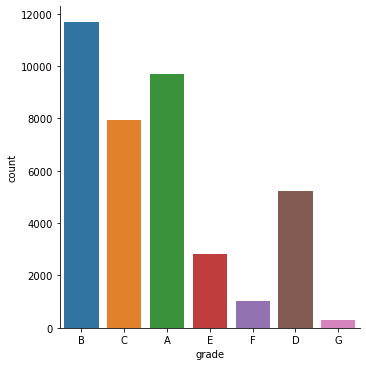

In [27]:
#Plotting the number of records per grade - distribution of grades
sns.catplot(x="grade", kind="count", data=df);

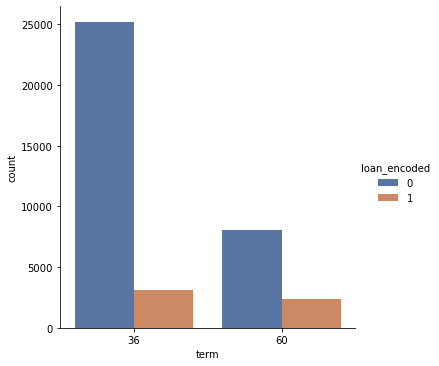

In [28]:
#Plotting the frequency of Fully paid and Charged Off loans for every loan term
sns.catplot(x="term", kind="count", palette="deep", data=df,hue='loan_encoded');

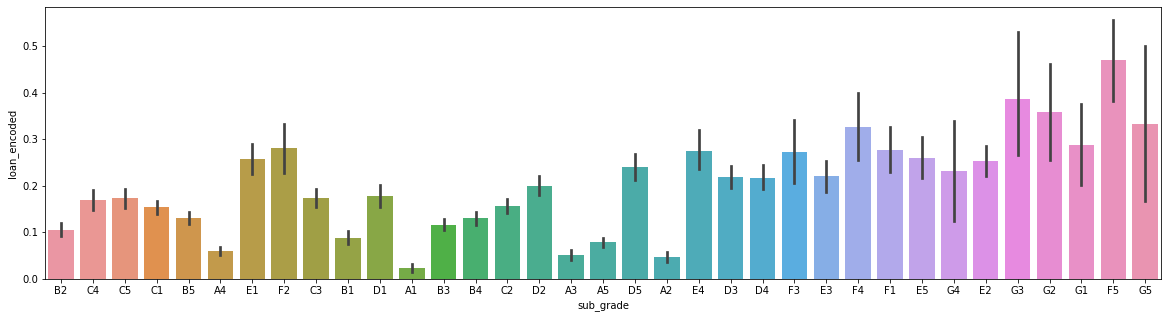

In [29]:
#Plotting the frequency per Sub Grade
plt.figure(figsize=(20, 5))
sns.barplot(x="sub_grade", y='loan_encoded', data=df);

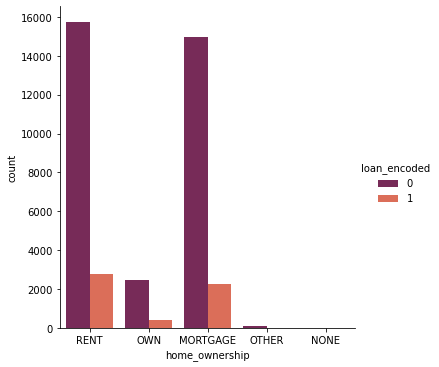

In [30]:
sns.catplot(x="home_ownership", kind="count", palette="rocket", data=df,hue='loan_encoded');


<AxesSubplot:xlabel='purpose', ylabel='count'>

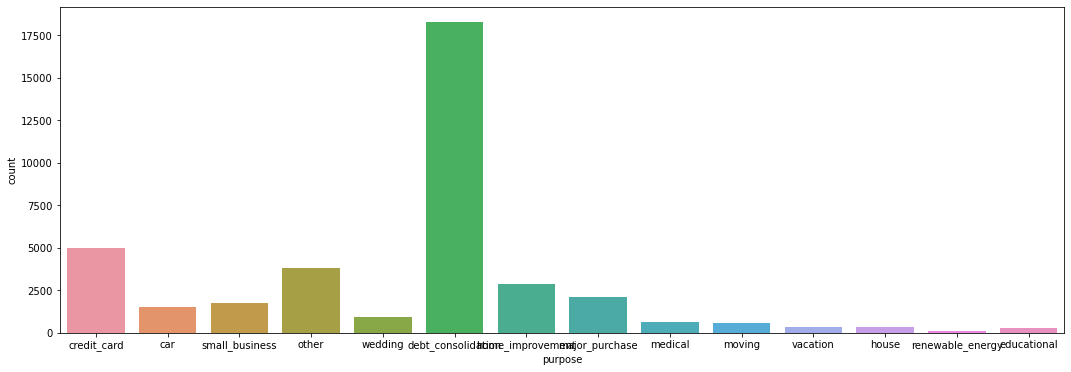

In [31]:
plt.figure(figsize=(18, 6))
sns.countplot(x="purpose", data=df)

<AxesSubplot:xlabel='issue_d', ylabel='loan_encoded'>

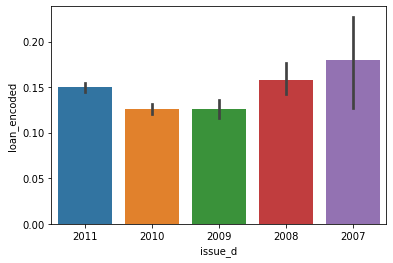

In [32]:
sns.barplot(x='issue_d', y='loan_encoded', data=df)

C:\Users\srhri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

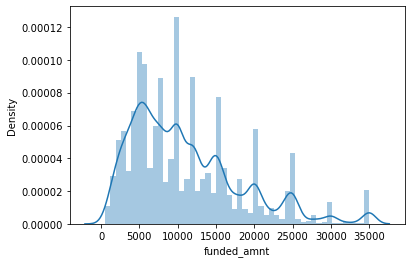

In [33]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['funded_amnt'])

<AxesSubplot:xlabel='int_rate_cat', ylabel='count'>

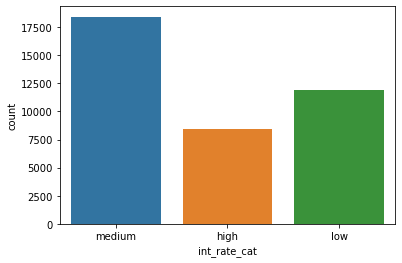

In [34]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    data
df['int_rate_cat'] = df['int_rate'].apply(lambda x: int_rate(x))
df['int_rate_cat'].value_counts()

sns.countplot(x="int_rate_cat", data=df)

<AxesSubplot:xlabel='home_ownership', ylabel='int_rate'>

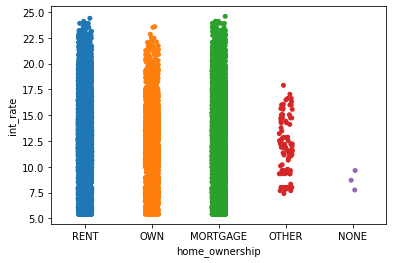

In [35]:
sns.stripplot(x=df['home_ownership'], y=df['int_rate'], data=df)

<AxesSubplot:>

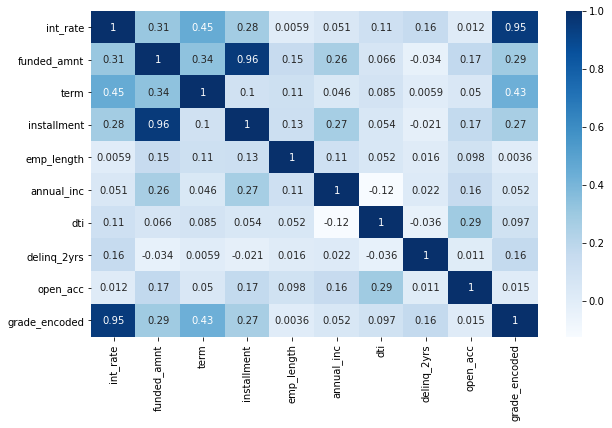

In [36]:
#correlation heatmap
plt.figure(figsize=(10, 6))
df_h=df[['int_rate','funded_amnt','term','installment','emp_length','annual_inc','dti','delinq_2yrs','open_acc','total_acc','grade_encoded','total_acc']]
sns.heatmap(df_h.corr(),annot=True,cmap='Blues')

<ipython-input-37-f8d4ac8d5626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['loan_status']=df['loan_encoded']


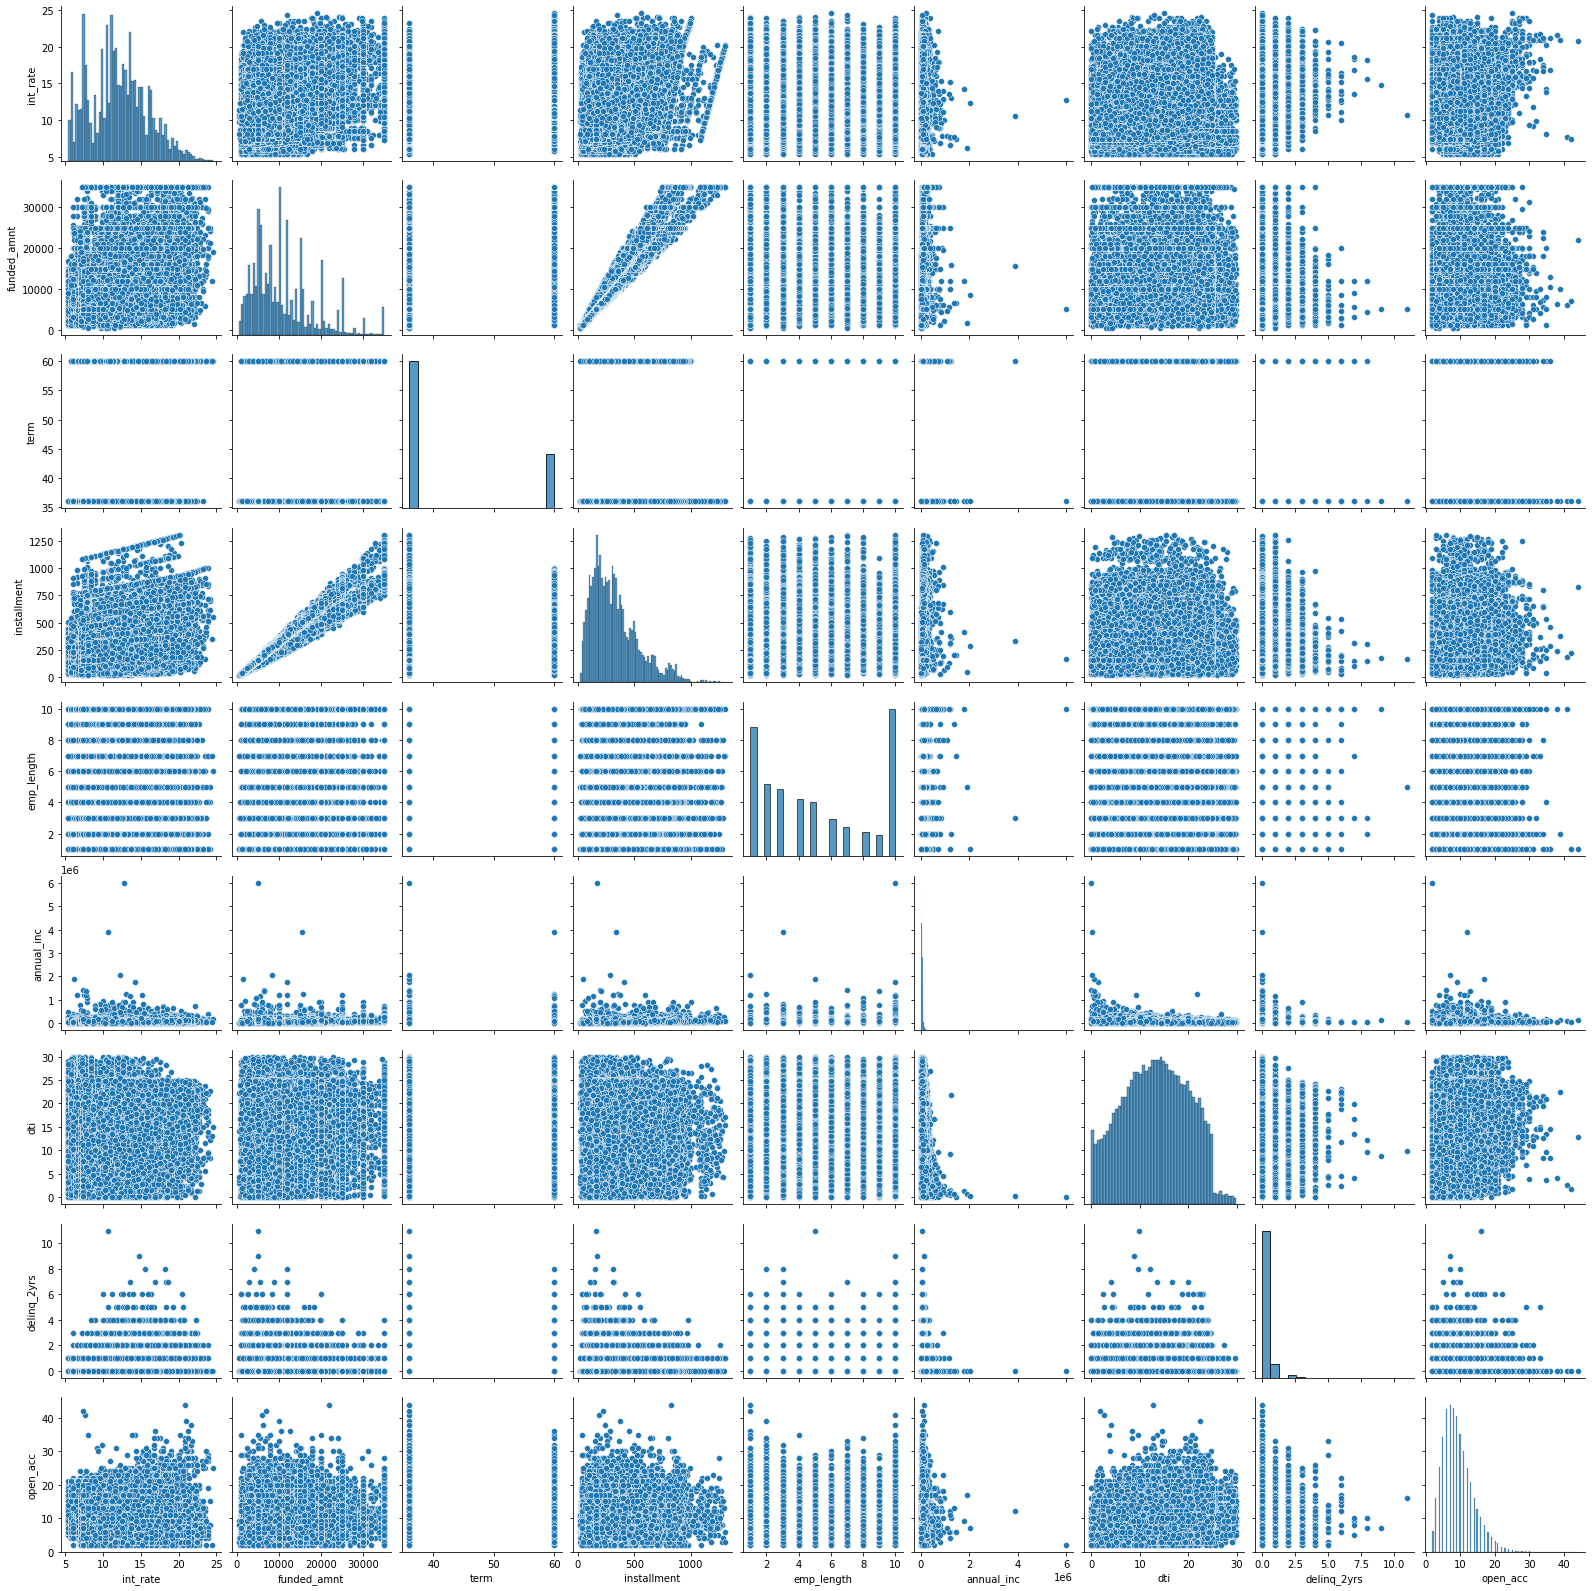

In [37]:
df_h['loan_status']=df['loan_encoded']
sns.pairplot(df_h.iloc[:,:9])

In [38]:
df['issue_d'] = df['issue_d'].str.split('-').str[1]

In [39]:
df

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,zip_code,addr_state,dti,delinq_2yrs,open_acc,total_acc,loan_encoded,total_acc,grade_encoded,int_rate_cat
0,5000.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,...,860xx,AZ,27.65,0.0,3.0,9.0,0,9.0,1,medium
1,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,...,309xx,GA,1.00,0.0,3.0,4.0,1,4.0,2,high
2,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,606xx,IL,8.72,0.0,2.0,10.0,0,10.0,2,high
3,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,917xx,CA,20.00,0.0,10.0,37.0,0,37.0,2,medium
4,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,...,972xx,OR,17.94,0.0,15.0,38.0,0,38.0,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,...,802xx,CO,11.33,0.0,13.0,40.0,0,40.0,0,low
39782,8500.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,...,274xx,NC,6.40,1.0,6.0,9.0,0,9.0,2,medium
39783,5000.0,36,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,...,017xx,MA,2.30,0.0,11.0,20.0,0,20.0,0,low
39784,5000.0,36,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,...,208xx,MD,3.72,0.0,17.0,26.0,0,26.0,0,low


In [40]:
def expand(dataframe, column, pre):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[column], prefix=pre)],axis=1)
    dataframe = dataframe.drop(column, axis=1)
    return(dataframe)

In [41]:
#One hot encoding of categorical variables
df = expand(df,'home_ownership', 'HO')
df = expand(df,'verification_status', 'VS')
df = expand(df,'loan_status', 'LS')
df = expand(df,'purpose', 'P')
df = expand(df,'issue_d', 'Year')

In [42]:
df

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,zip_code,addr_state,...,P_home_improvement,P_house,P_major_purchase,P_medical,P_moving,P_other,P_renewable_energy,P_small_business,P_vacation,P_wedding
0,5000.0,36,10.65,162.87,B,B2,10,24000.0,860xx,AZ,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,C,C4,1,30000.0,309xx,GA,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,C,C5,10,12252.0,606xx,IL,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,36,13.49,339.31,C,C1,10,49200.0,917xx,CA,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,60,12.69,67.79,B,B5,1,80000.0,972xx,OR,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36,8.07,78.42,A,A4,4,110000.0,802xx,CO,...,1,0,0,0,0,0,0,0,0,0
39782,8500.0,36,10.28,275.38,C,C1,3,18000.0,274xx,NC,...,0,0,0,0,0,0,0,0,0,0
39783,5000.0,36,8.07,156.84,A,A4,1,100000.0,017xx,MA,...,0,0,0,0,0,0,0,0,0,0
39784,5000.0,36,7.43,155.38,A,A2,1,200000.0,208xx,MD,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:xlabel='grade_class', ylabel='count'>

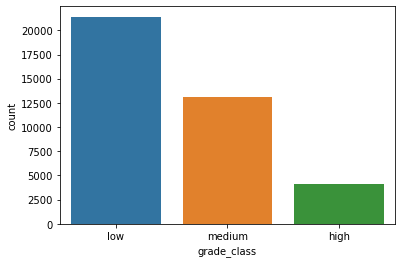

In [43]:
def grade(n):
    if n == 'A' or n == 'B':
        return 'low'
    elif n == 'C' or n == 'D':
        return 'medium'
    else:
        return 'high'
    
    
df['grade_class'] = df['grade'].apply(lambda x: grade(x))

sns.countplot(x="grade_class", data=df)

In [44]:
#Encoding the target variable
lb_make = LabelEncoder()
df['grade_encoded'] = lb_make.fit_transform(df['grade_class'])

In [45]:
#Dropping columns which are not relevant for grade_class prediction
df = df.drop(['sub_grade', 'zip_code', 'grade','addr_state','int_rate','installment', 'grade_class', 'int_rate_cat'], axis=1)

In [46]:
#Changing column type
df['funded_amnt'] = df['funded_amnt'].astype(float)
df['annual_inc'] = df['annual_inc'].astype(float)
df['dti'] = df['dti'].astype(float)
df['delinq_2yrs'] = df['delinq_2yrs'].astype(float)
df['open_acc'] = df['open_acc'].astype(float)
df['total_acc'] = df['total_acc'].astype(float)

In [47]:
df.shape

(38708, 35)

In [48]:
#X,y split
X = df.loc[:, df.columns != 'grade_encoded']  # Features
y = df['grade_encoded']  # Labels

### STANDARDIZATION

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

### MODELING

In [50]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [52]:
#Create a Random forest Classifier
rfc=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

#Predicting using the created model
y_pred=rfc.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.620425385344011
[[ 368  294  595]
 [  83 5372 1014]
 [ 241 2181 1465]]


In [53]:
y_test.value_counts()

1    6469
2    3887
0    1257
Name: grade_encoded, dtype: int64

In [54]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.33247222939808835


In [55]:
#Create a svm Classifier
sup = svm.SVC(gamma='scale') # Linear Kernel

#Train the model using the training sets
sup.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = sup.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6019977611297683


In [56]:
#Logistic Regression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6110393524498406


C:\Users\srhri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5875312150176526


In [58]:
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(X_train, y_train)  
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
        learning_rate=1.0, n_estimators=1000, random_state=0)
ada.feature_importances_  

y_pred = ada.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6236114699044175


In [59]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.286580,0.333631,-0.542331,0.231904,-1.032553,-0.256150,0.784282,-0.579871,0.044118,0.122829,...,-0.002154,-0.007423,0.000427,-0.000094,-1.409146e-14,-1.519060e-15,-4.507309e-16,4.150281e-16,1.276760e-16,-5.769214e-16
1,-0.540895,1.276774,1.038756,1.087957,0.256413,0.429355,-0.444990,0.071764,-0.055777,-0.286086,...,-0.005263,-0.017033,-0.001206,0.000787,2.718031e-15,-8.366332e-16,9.609699e-16,-1.719300e-16,-4.760552e-17,1.358829e-16
2,-0.809271,-0.532285,0.147498,0.031321,-0.378983,0.171966,0.586159,0.225478,-0.219414,-0.385200,...,-0.003830,-0.019166,-0.004431,0.002408,-2.528947e-16,-4.835229e-16,3.567212e-16,-2.313999e-16,1.308443e-17,-1.743088e-17
3,-0.569588,0.124092,-0.387666,0.938101,0.138395,-0.022021,0.722430,0.559639,-0.401347,0.586245,...,-0.004098,-0.023495,-0.004052,0.001907,-1.128428e-15,-1.041108e-15,-1.935508e-16,7.327058e-16,7.316899e-17,4.437645e-17
4,-0.584344,0.395219,-0.386968,1.019264,0.128365,0.725058,-0.402162,0.414235,-0.270628,0.663835,...,-0.002104,-0.023858,0.003171,-0.002180,1.789179e-15,4.292303e-16,-1.669627e-17,-4.641368e-16,-1.000039e-16,-1.255290e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38703,0.404190,-1.114615,0.339783,0.101559,-0.113114,-0.079392,-0.236307,0.152744,-0.078621,-0.571070,...,-0.001995,-0.025022,0.002888,-0.001620,6.732999e-17,1.319909e-17,3.461773e-17,2.674167e-19,9.099431e-19,7.187014e-18
38704,-0.967389,-0.578923,0.100083,0.200752,-0.560327,0.047257,0.044135,-0.695777,0.089813,0.047900,...,-0.000820,0.084503,-0.006011,0.003182,-3.007991e-17,6.086689e-18,-1.702593e-17,-4.915250e-18,-2.387861e-18,1.071374e-18
38705,0.220170,-0.805769,0.169229,-0.607674,0.487228,-0.227576,-0.563236,-0.079065,-0.049062,0.020507,...,0.001136,-0.012627,0.003554,-0.002252,-2.101826e-17,1.943935e-17,4.009796e-17,-1.507178e-17,2.030678e-19,1.966524e-19
38706,0.202559,-1.095878,0.360905,0.175251,-0.190084,-0.115373,-0.567417,0.462019,-0.300418,0.639005,...,0.000717,-0.012656,0.016156,-0.009579,3.695426e-17,1.188188e-17,4.210219e-18,6.144608e-18,-3.133217e-18,-3.843946e-18


In [60]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.83077809e-01, 1.49769800e-01, 1.25312297e-01, 1.04240097e-01,
       9.48552701e-02, 5.93474966e-02, 4.57782922e-02, 4.23895782e-02,
       3.60137388e-02, 2.98624991e-02, 2.23921186e-02, 1.79449873e-02,
       1.73956707e-02, 1.50666021e-02, 1.14674383e-02, 9.56296435e-03,
       8.57825425e-03, 6.78407127e-03, 5.43391688e-03, 3.84057354e-03,
       3.29044412e-03, 2.99858220e-03, 1.68948767e-03, 1.20040017e-03,
       9.34488354e-04, 7.03828141e-04, 3.48447756e-05, 3.44498665e-05,
       3.61057316e-32, 5.54767566e-33, 2.05777754e-33, 1.10057110e-33,
       1.10057110e-33, 2.32675065e-34])

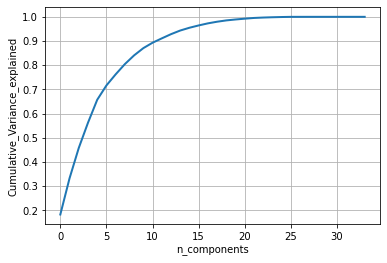

In [61]:
cum_var_explained=np.cumsum(explained_variance)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [62]:
pca=PCA()  
pca.n_components=34
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=18.240000
if n_components= 1,   variance=33.380000
if n_components= 2,   variance=45.990000
if n_components= 3,   variance=56.340000
if n_components= 4,   variance=65.760000
if n_components= 5,   variance=71.680000
if n_components= 6,   variance=76.260000
if n_components= 7,   variance=80.470000
if n_components= 8,   variance=84.070000
if n_components= 9,   variance=87.060000
if n_components= 10,   variance=89.300000
if n_components= 11,   variance=91.100000
if n_components= 12,   variance=92.830000
if n_components= 13,   variance=94.320000
if n_components= 14,   variance=95.460000
if n_components= 15,   variance=96.410000
if n_components= 16,   variance=97.270000
if n_components= 17,   variance=97.960000
if n_components= 18,   variance=98.500000
if n_components= 19,   variance=98.890000
if n_components= 20,   variance=99.220000
if n_components= 21,   variance=99.530000
if n_components= 22,   variance=99.700000
if n_components= 23,   variance=99.820000
if

In [63]:
pca=PCA(.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 12


shape of PCA data (27095, 2)


C:\Users\srhri\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


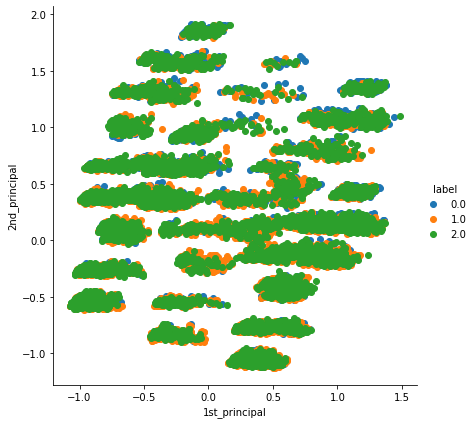

In [64]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [65]:
pca=PCA(.90) 
pca.fit(X_train) 
X_train=pca.transform(X_train) 
X_test=pca.transform(X_test)
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

In [66]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))  
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))   
print('Recall:',recall_score(y_test,y_pred,average='weighted'))   
print('Precision:',precision_score(y_test,y_pred,average='weighted'))  
print('\n clasification report:\n',classification_report(y_test,y_pred))  
print('\n confussion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.5337983294583656
F1 score: 0.515187556514798
Recall: 0.5337983294583656
Precision: 0.540639149687928

 clasification report:
               precision    recall  f1-score   support

           0       0.29      0.71      0.42      1257
           1       0.68      0.71      0.70      6469
           2       0.38      0.18      0.24      3887

    accuracy                           0.53     11613
   macro avg       0.45      0.54      0.45     11613
weighted avg       0.54      0.53      0.52     11613


 confussion matrix:
 [[ 898  212  147]
 [ 886 4607  976]
 [1277 1916  694]]


In [67]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [68]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(12,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 20


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/20
678/678 [==============================] - 2s 2ms/step - loss: 1.0534 - accuracy: 0.5544 - val_loss: 0.8555 - val_accuracy: 0.5791
Epoch 2/20
678/678 [==============================] - 0s 720us/step - loss: 0.8350 - accuracy: 0.5869 - val_loss: 0.8551 - val_accuracy: 0.5839
Epoch 3/20
678/678 [==============================] - 1s 751us/step - loss: 0.8228 - accuracy: 0.5975 - val_loss: 0.8481 - val_accuracy: 0.5866
Epoch 4/20
678/678 [==============================] - 1s 812us/step - loss: 0.8284 - accuracy: 0.5963 - val_loss: 0.8477 - val_accuracy: 0.5887
Epoch 5/20
678/678 [==============================] - 1s 802us/step - loss: 0.8232 - accuracy: 0.5984 - val_loss: 0.8510 - val_accuracy: 0.5876
Epoch 6/20
678/678 [==============================] - 1s 804us/step - loss: 0.8214 - accuracy: 0.5989 - val_loss: 0.8593 - val_accuracy: 0.5841
Epoch 7/20
678/678 [==============================] - 1s 825us/step - loss: 0.8213 - accuracy: 0.6018 - val_loss: 0.8490 - val_accuracy: 0

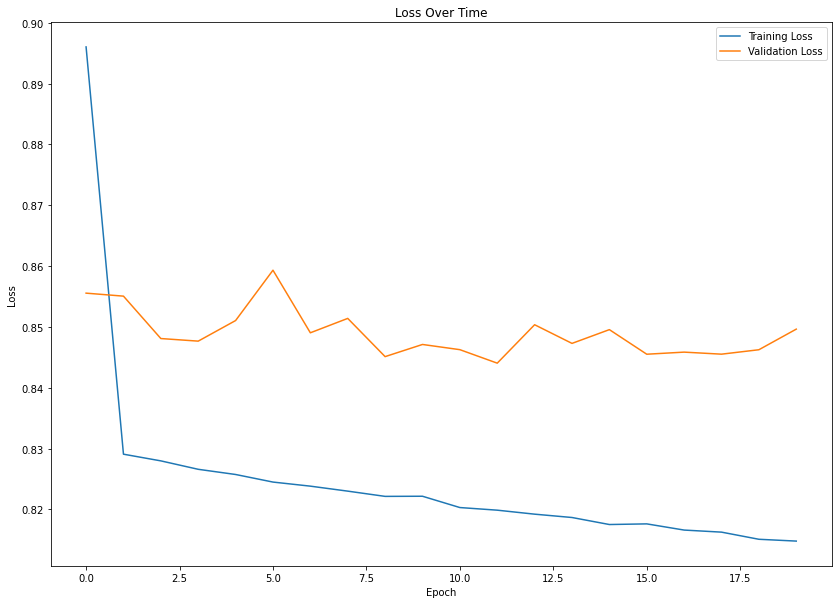

In [69]:
plt.figure(figsize=(14, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

In [70]:
model.evaluate(X_test, y_test)

363/363 [==============================] - 0s 572us/step - loss: 0.8370 - accuracy: 0.5963


[0.8369871377944946, 0.5963144898414612]